In [1]:
#Load dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn

In [2]:
#Load movie names and movie ratings
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)

In [3]:
def replace_name(x):
    return movies[movies['movieId']==x].title.values[0]
ratings.movieId = ratings.movieId.map(replace_name)
M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
m = M.shape
df1 = M.replace(np.nan, 0, regex=True)
X_std = StandardScaler().fit_transform(df1)

In [4]:
## Convergence Matrix and Eigen vector Decomposition

In [5]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.0013947  -0.00276421 -0.00195661 ... -0.00858289 -0.00321221
  -0.01055463]
 [-0.00276421  1.0013947  -0.00197311 ...  0.14004611 -0.0032393
  -0.01064364]
 [-0.00195661 -0.00197311  1.0013947  ... -0.00612653 -0.0022929
  -0.00753398]
 ...
 [-0.00858289  0.14004611 -0.00612653 ...  1.0013947   0.02888777
   0.14005644]
 [-0.00321221 -0.0032393  -0.0022929  ...  0.02888777  1.0013947
   0.01676203]
 [-0.01055463 -0.01064364 -0.00753398 ...  0.14005644  0.01676203
   1.0013947 ]]


In [7]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.0013947  -0.00276421 -0.00195661 ... -0.00858289 -0.00321221
  -0.01055463]
 [-0.00276421  1.0013947  -0.00197311 ...  0.14004611 -0.0032393
  -0.01064364]
 [-0.00195661 -0.00197311  1.0013947  ... -0.00612653 -0.0022929
  -0.00753398]
 ...
 [-0.00858289  0.14004611 -0.00612653 ...  1.0013947   0.02888777
   0.14005644]
 [-0.00321221 -0.0032393  -0.0022929  ...  0.02888777  1.0013947
   0.01676203]
 [-0.01055463 -0.01064364 -0.00753398 ...  0.14005644  0.01676203
   1.0013947 ]]


In [8]:
#### After the covariance matrix is generated, eigendecomposition is performed on the covariance matrix. 
### Eigenvectors and eigenvalues are found as a result of the eigendceomposition. 
## Each eigenvector has a corresponding eigenvalue, and the sum of the eigenvalues represents all of 
# the variance within the entire dataset.

In [9]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.34830861e-04+0.00000000e+00j  5.76715196e-04+0.00000000e+00j
   4.83014783e-05+0.00000000e+00j ... -1.55035394e-18+7.62033090e-19j
   3.28908171e-19+0.00000000e+00j -7.41142419e-19+0.00000000e+00j]
 [ 5.61303451e-04+0.00000000e+00j -1.11493526e-02+0.00000000e+00j
   8.85798170e-03+0.00000000e+00j ... -1.27391093e-18+5.57964691e-19j
   2.82058720e-19+0.00000000e+00j -6.64130165e-19+0.00000000e+00j]
 [ 4.58686517e-04+0.00000000e+00j -2.39083484e-03+0.00000000e+00j
   6.58309436e-04+0.00000000e+00j ...  2.75385985e-18-8.09397078e-19j
   1.28315531e-18+0.00000000e+00j  9.62033214e-19+0.00000000e+00j]
 ...
 [ 5.22202072e-03+0.00000000e+00j -5.49944367e-03+0.00000000e+00j
   5.16164779e-03+0.00000000e+00j ...  1.42967687e-17-6.85395349e-18j
  -3.14933300e-18+0.00000000e+00j  6.72469015e-18+0.00000000e+00j]
 [ 8.97514078e-04+0.00000000e+00j -1.14918748e-02+0.00000000e+00j
   9.41277803e-03+0.00000000e+00j ... -7.82516752e-17+3.85654283e-17j
   1.66798188e-17+0.00000000e+00j

In [10]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1541.6665576008295
423.9204599853913
319.07447507743416
279.3303575808149
251.63844082955117
218.62439973216073
154.61586911307703
138.60396745179108
137.6669785626193
119.37014654115794
115.27955666258546
105.40594030056857
97.84201186745491
96.72012660587353
93.39647211318348
87.74919373452808
87.54664687999126
85.93371257360818
72.85051428001304
70.37154679336622
64.45310203297909
63.78603164551938
62.11260590665582
60.08066162877592
57.67255079811303
56.490104252992296
55.48183563193662
53.78161965096382
51.87605726173503
49.73136845197343
48.26199717686776
47.25201767646891
44.6806508932753
44.088901173645084
42.66992309039993
41.16550743549884
40.1389432151239
38.60377289834526
37.90168326378631
37.05779485263377
35.990629074172276
35.36479673662892
34.939140032345534
34.44959260323362
33.346807288896755
33.10862320543912
32.2949243107892
32.23032178980716
31.618073795157798
30.98036460471987
30.18263104389037
29.642559075633503
29.48362459454198


5.199301801061381e-14
5.208235126815101e-14
5.212173085115986e-14
5.13517085751079e-14
5.13517085751079e-14
5.169094954318964e-14
5.1525550108473204e-14
4.96898763727925e-14
4.96898763727925e-14
5.1180005980600467e-14
5.1180005980600467e-14
5.099560242631162e-14
5.148154091712866e-14
5.148154091712866e-14
5.147262095969574e-14
5.147262095969574e-14
5.151087633710972e-14
5.12972675307453e-14
5.069840705660828e-14
5.069840705660828e-14
5.078260997016642e-14
5.046982745478362e-14
5.038166191086997e-14
5.101259616648055e-14
5.101259616648055e-14
5.10510721509676e-14
5.075798843337498e-14
4.969289315136068e-14
4.969289315136068e-14
5.006490589311438e-14
5.006490589311438e-14
5.0219298848756154e-14
5.004468899295959e-14
5.004468899295959e-14
5.030552762876913e-14
5.030552762876913e-14
5.046046156998964e-14
5.046046156998964e-14
5.0409152572607895e-14
5.020704183078812e-14
5.020704183078812e-14
4.996523576245722e-14
4.996523576245722e-14
4.989010681227272e-14
4.9501042080974444e-14
4.95010420

3.2909348523561896e-14
3.2909348523561896e-14
3.312714440457642e-14
3.312714440457642e-14
3.317838560893899e-14
3.317838560893899e-14
3.3252221011184055e-14
3.312219679597004e-14
3.312219679597004e-14
3.2683750049206644e-14
3.2683750049206644e-14
3.323291020158398e-14
3.323291020158398e-14
3.0239769231922225e-14
3.0239769231922225e-14
3.308196657464402e-14
3.1924580017697463e-14
3.1924580017697463e-14
3.113103606304069e-14
3.113103606304069e-14
3.246558111996232e-14
3.246558111996232e-14
3.3250345290337105e-14
3.318906723742157e-14
3.318906723742157e-14
3.297432424741299e-14
3.297432424741299e-14
2.927003485287382e-14
2.927003485287382e-14
3.2536063944420005e-14
3.2536063944420005e-14
3.276535182205568e-14
3.276535182205568e-14
3.280925336403616e-14
3.280925336403616e-14
3.2780573201989556e-14
3.273813733398038e-14
3.273813733398038e-14
3.157671794117608e-14
3.157671794117608e-14
3.304127133448617e-14
3.2902326796345045e-14
3.277150694336993e-14
3.277150694336993e-14
3.2760453611563506

2.339580443139747e-14
2.3966012621648728e-14
2.4100465905673586e-14
2.4100465905673586e-14
2.462565744846026e-14
2.462565744846026e-14
2.4211191396702708e-14
2.4211191396702708e-14
2.3777793390475654e-14
2.3777793390475654e-14
2.3519235621709928e-14
2.3519235621709928e-14
2.3473453695627726e-14
2.3540982589259908e-14
2.3540982589259908e-14
2.4028857391274732e-14
2.4028857391274732e-14
2.4174457100910754e-14
2.4174457100910754e-14
2.3813749019988144e-14
2.446973393965401e-14
2.446973393965401e-14
2.3937146010808887e-14
2.3937146010808887e-14
2.4876476126219055e-14
2.4811299652386243e-14
2.4811299652386243e-14
2.4608571047072924e-14
2.4460824596946093e-14
2.4460824596946093e-14
2.4236705036878906e-14
2.5061733674999735e-14
2.3738013260428357e-14
2.3738013260428357e-14
2.3883116623327092e-14
2.3961989081437022e-14
2.415348368060853e-14
2.415348368060853e-14
2.4733931620549616e-14
2.4733931620549616e-14
2.46569361650046e-14
2.4482927329491158e-14
2.4482927329491158e-14
2.4226430829626482e-

1.887868387038916e-14
1.8562020615761063e-14
1.8562020615761063e-14
1.8648225201361444e-14
1.939210046290741e-14
1.8947695499511732e-14
1.9194158144809108e-14
1.9194158144809108e-14
1.928508956732342e-14
1.9044226327408073e-14
1.4048513541841007e-14
1.4048513541841007e-14
1.7008986791641518e-14
1.7008986791641518e-14
1.654577987153799e-14
1.654577987153799e-14
1.668622651468764e-14
1.668622651468764e-14
1.68094768930467e-14
1.68094768930467e-14
1.7581454802499126e-14
1.7581454802499126e-14
1.7302769453583193e-14
1.7302769453583193e-14
1.787946718462354e-14
1.787946718462354e-14
1.69565835413018e-14
1.69565835413018e-14
1.7516122993455204e-14
1.7516122993455204e-14
1.7000757385440038e-14
1.7000757385440038e-14
1.6799697139506204e-14
1.6799697139506204e-14
1.7498101589742037e-14
1.7498101589742037e-14
1.773435684101117e-14
1.773435684101117e-14
1.6760740484627046e-14
1.6760740484627046e-14
1.7891338330064334e-14
1.7891338330064334e-14
1.8111513638704283e-14
1.8111513638704283e-14
1.72580

8.526509669812387e-15
8.526509669812387e-15
8.809749526731014e-15
8.809749526731014e-15
8.547415059254672e-15
8.547415059254672e-15
7.753848444083145e-15
7.753848444083145e-15
7.81729767819627e-15
7.81729767819627e-15
1.0178504000550442e-14
1.0178504000550442e-14
1.0769249995815355e-14
1.0769249995815355e-14
7.988809774604514e-15
7.988809774604514e-15
9.698243994486521e-15
9.698243994486521e-15
9.136838348803016e-15
9.136838348803016e-15
9.949950214764891e-15
9.949950214764891e-15
9.827400171718174e-15
9.827400171718174e-15
8.544537493435282e-15
8.544537493435282e-15
8.346674444681092e-15
8.346674444681092e-15
9.136359565134038e-15
9.136359565134038e-15
1.0450820878445795e-14
1.0450820878445795e-14
9.503131906466315e-15
9.503131906466315e-15
9.712071077536659e-15
9.712071077536659e-15
8.650348827287835e-15
8.650348827287835e-15
9.073965200725257e-15
9.073965200725257e-15
1.0592429291649702e-14
1.0592429291649702e-14
9.864872765533017e-15
9.864872765533017e-15
9.817471107710125e-15
9.81

6.33556569045792e-15
6.33556569045792e-15
5.695016202488845e-15
5.695016202488845e-15
6.537385829324901e-15
6.537385829324901e-15
6.1857067705627725e-15
6.1857067705627725e-15
5.197808479530859e-15
5.197808479530859e-15
6.192833977036042e-15
6.192833977036042e-15
6.721433608613345e-15
6.721433608613345e-15
7.187379266573675e-15
7.187379266573675e-15
7.500103671561605e-15
7.500103671561605e-15
5.3661354017423225e-15
5.3661354017423225e-15
6.898002586076178e-15
6.898002586076178e-15
6.678338332851582e-15
6.678338332851582e-15
7.334439438465144e-15
7.334439438465144e-15
6.9653652128337926e-15
6.9653652128337926e-15
4.890929350190399e-15
4.890929350190399e-15
6.111147277600406e-15
6.111147277600406e-15
5.957666681095359e-15
5.957666681095359e-15
4.992910108199334e-15
4.992910108199334e-15
5.563730748927986e-15
5.563730748927986e-15
7.5965189958144e-15
7.5965189958144e-15
7.844605766004267e-15
7.844605766004267e-15
7.716803452019962e-15
7.716803452019962e-15
7.801775267398807e-15
7.80177526

3.373441009069023e-15
3.2673805252955118e-15
3.2673805252955118e-15
2.9827983770012014e-15
2.9827983770012014e-15
3.0902893859810342e-15
3.0902893859810342e-15
3.018092417889367e-15
3.018092417889367e-15
3.2924945382716097e-15
3.2924945382716097e-15
3.33003018583353e-15
3.1138934765031784e-15
3.1138934765031784e-15
3.1027205188866407e-15
3.149678759393065e-15
3.149678759393065e-15
3.2275889318750102e-15
2.540559070443617e-15
2.540559070443617e-15
2.783110378224405e-15
2.783110378224405e-15
2.847482958473495e-15
2.847482958473495e-15
2.427623045101412e-15
2.427623045101412e-15
3.013012060609586e-15
3.013012060609586e-15
1.8601410351946693e-15
1.8601410351946693e-15
2.6318803175548905e-15
2.6318803175548905e-15
2.9996487788145826e-15
2.9996487788145826e-15
1.5571998877887881e-15
1.5571998877887881e-15
1.6694512614445188e-15
1.6694512614445188e-15
2.8560599449227624e-15
2.8560599449227624e-15
2.8965376430050607e-15
2.8965376430050607e-15
2.6757312748917955e-15
2.6757312748917955e-15
1.730

1.7194646973237692e-16
1.6483026138120908e-16
1.6483026138120908e-16
1.6671239000576886e-16
1.516091597864379e-16
1.516091597864379e-16
1.5008122763778074e-16
1.5008122763778074e-16
1.3331366228502544e-16
1.3331366228502544e-16
1.3044642608301292e-16
1.3044642608301292e-16
1.414534609779756e-16
1.414534609779756e-16
1.349645437698554e-16
1.349645437698554e-16
1.2953284819631235e-16
1.2136449370270741e-16
1.2136449370270741e-16
1.1673188950977909e-16
1.1673188950977909e-16
1.173657648268413e-16
1.173657648268413e-16
1.1444081773416354e-16
1.1444081773416354e-16
1.0399815547774159e-16
9.53829228975858e-17
9.53829228975858e-17
9.338738875917184e-17
9.338738875917184e-17
9.148344325770119e-17
9.148344325770119e-17
8.221819176947773e-17
8.221819176947773e-17
8.483282937413488e-17
8.483282937413488e-17
8.00758059956317e-17
8.00758059956317e-17
8.056904341472388e-17
7.308172957769971e-17
7.308172957769971e-17
7.323072334786005e-17
7.14739561663901e-17
7.14739561663901e-17
6.705700943242883e-1

5.820233716300783e-30
5.85018563995081e-30
5.85018563995081e-30
5.757000153931037e-30
5.757000153931037e-30
5.616385675071379e-30
5.751207116470009e-30
5.751207116470009e-30
5.733796180703317e-30
5.733796180703317e-30
5.6900858798400114e-30
5.6900858798400114e-30
5.754401285055945e-30
5.754401285055945e-30
5.651773153307559e-30
5.651773153307559e-30
5.5713904901435706e-30
5.5713904901435706e-30
5.550614029863371e-30
5.550614029863371e-30
5.644833590622752e-30
5.644833590622752e-30
5.551945424872801e-30
5.551945424872801e-30
5.438849811984426e-30
5.438849811984426e-30
5.5002092001418875e-30
5.5002092001418875e-30
5.573626530367558e-30
5.573626530367558e-30
5.4550485385878484e-30
5.4550485385878484e-30
5.418639795818261e-30
5.418639795818261e-30
5.4955954133750795e-30
5.4955954133750795e-30
5.531449354514522e-30
5.531449354514522e-30
5.452055600888746e-30
5.452055600888746e-30
5.4585459856984645e-30
5.4585459856984645e-30
5.274459427618987e-30
5.274459427618987e-30
5.258890039440551e-30


1.0968761580754975e-31
1.0968761580754975e-31
1.0391924912908288e-31
1.0391924912908288e-31
1.0493222135777283e-31
1.0493222135777283e-31
1.0628492023995528e-31
1.0628492023995528e-31
1.0388840113758544e-31
1.0388840113758544e-31
1.0104941369181067e-31
1.0104941369181067e-31
9.785016391475527e-32
9.785016391475527e-32
9.338237083156112e-32
9.338237083156112e-32
9.137289706272473e-32
9.137289706272473e-32
8.633308724626921e-32
8.633308724626921e-32
8.494455511169153e-32
8.494455511169153e-32
8.818689822754242e-32
8.818689822754242e-32
8.307671144843734e-32
8.307671144843734e-32
8.947733238889979e-32
8.947733238889979e-32
8.599000468151232e-32
8.599000468151232e-32
8.568791770174149e-32
8.847463359529867e-32
8.847463359529867e-32
8.489205082523154e-32
8.489205082523154e-32
8.324678045858073e-32
8.324678045858073e-32
7.59151611556587e-32
7.59151611556587e-32
7.636327843073969e-32
7.636327843073969e-32
8.00344902378253e-32
8.00344902378253e-32
7.937827164827003e-32
7.937827164827003e-32
7.

In [13]:
pca = sklearnPCA(n_components=2)
pca.fit_transform(df1)
print (pca.explained_variance_ratio_)

[0.13379809 0.03977444]


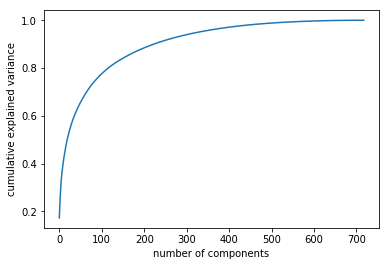

In [14]:
#Explained variance
pca = sklearnPCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()